In [1]:
# import necessary modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# files

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
Amsterdam = pd.read_csv(r'C:/Users/foeke/OneDrive/Documenten/submitting paper/TooBigData/SpatialPredictionPatterns/Predicting NO2-AllModelsAmsterdam100_xy.csv', sep=',')
Hamburg = pd.read_csv(r'C:/Users/foeke/OneDrive/Documenten/submitting paper/TooBigData/SpatialPredictionPatterns/Predicting NO2-AllModelsHamburg100_xy.csv', sep = ',')
Bayreuth = pd.read_csv(r'C:/Users/foeke/OneDrive/Documenten/submitting paper/TooBigData/SpatialPredictionPatterns/Predicting NO2-AllModelsBayreuth100_xy.csv', sep=',')
Utrecht = pd.read_csv(r'C:/Users/foeke/OneDrive/Documenten/submitting paper/TooBigData/SpatialPredictionPatterns/Predicting NO2-AllModelsUtrecht100_xy.csv', sep=',')

## Rename column for unique identifier, per city

In [3]:
Amsterdam = Amsterdam.rename(columns ={"Unnamed: 0": "FID"  })
Bayreuth = Bayreuth.rename(columns ={"Unnamed: 0": "FID"  })
Hamburg = Hamburg.rename(columns ={"Unnamed: 0": "FID"  })
Utrecht = Utrecht.rename(columns ={"Unnamed: 0": "FID"  })

### assigning an indicator like Location to distinguish your three sets of data

In [4]:
Amsterdam = Amsterdam[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Amsterdam')

Bayreuth = Bayreuth[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Bayreuth')

Hamburg = Hamburg[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Hamburg')

Utrecht = Utrecht[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Utrecht')


## convert multiple columns into one per city

In [5]:
cities = pd.concat([Amsterdam, Bayreuth, Hamburg, Utrecht])
cities_melt = pd.melt(cities, id_vars=['location'], var_name=['Model'])

## Visualize

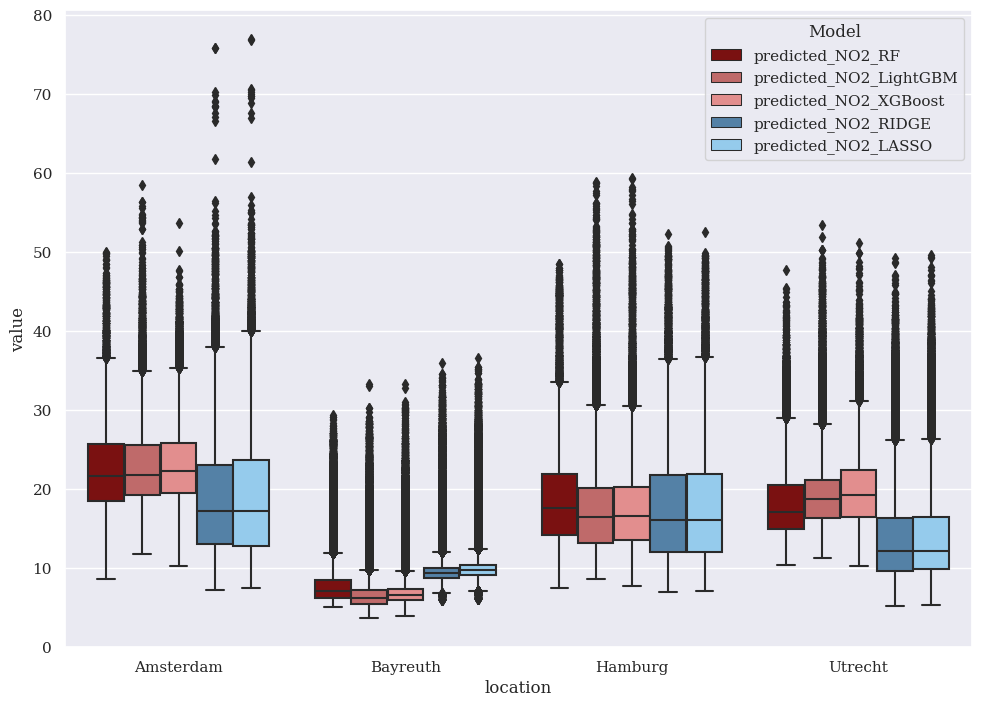

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#define font
plt.rcParams["font.family"] = "serif"

Model_colors=["darkred","indianred","lightcoral","steelblue","lightskyblue"]
ax = sns.boxplot(x="location", y="value", hue="Model", data=cities_melt, palette=Model_colors)    

plt.savefig('Distribution predicted NO2 per model', bbox_inches='tight',
           facecolor=(1, 1, 1))

plt.show()